In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

In [42]:
# Вывод данных из csv во всю ширину окна
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)



<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

## Убираем индекс

In [43]:
df0 = pd.DataFrame({"ID": ["A", "B", "A", "C", "A", "A", "C", "B"], "value": [1, 2, 4, 3, 6, 7, 3, 4]})
print('Первые 5 строк:\n', df0.head())
print('Количество строк и колонок:\n', df0.shape)
print('Типы данных:\n', df0.dtypes)

df_group1 = df0.set_index("ID") # сделаем колонку ID индексом
print ('делаем колонку ID индексом:\n', df_group1)

# plt.figure(figsize=(12, 8)) # Изменяем размер


df_group2 = df0.groupby("ID", as_index=False).sum() #  Фиксация строки
# print (df_group2)

# df_group1 = df0.groupby("ID").sum().reset_index() #  Убираем индекс


Первые 5 строк:
   ID  value
0  A      1
1  B      2
2  A      4
3  C      3
4  A      6
Количество строк и колонок:
 (8, 2)
Типы данных:
 ID       object
value     int64
dtype: object
делаем колонку ID индексом:
     value
ID       
A       1
B       2
A       4
C       3
A       6
A       7
C       3
B       4


1) Предположим, что Толя любит авокадо и решил посмотреть динамику цен на данный продукт в США. Имеется следующий набор данных от Hass Avocado Board 🥑:
Date — дата
AveragePrice — средняя цена одного авокадо
Total Volume — количество проданных авокадо
4046 — количество проданных авокадо PLU* 4046
4225 — количество проданных авокадо PLU 4225
4770 — количество проданных авокадо PLU 4770
Total Bags — всего упаковок
Small Bags — маленькие упаковки
Large Bags — большие
XLarge Bags — очень большие
type — обычный или органический
year — год
Region — город или регион the city or region of the observation
*PLU — код товара (Product Lookup code)
*В датафрейме находятся данные не за каждый день, а за конец каждой недели. Для каждой даты есть несколько наблюдений, отличающихся по типу авокадо и региону продажи. Предположим, что нас это разделение не интересует, поэтому в avocado_mean записаны агрегированные данные, где:
avocado_mean = pd.read_csv("path",
                           index_col=0, squeeze=True, parse_dates=['Date'])

                           Date
                           2015-01-04    1.301296
                           2015-01-11    1.370648
                           2015-01-18    1.391111
                           2015-01-25    1.397130
                           2015-02-01    1.247037
                           Name: AveragePrice, dtype: float64

In [44]:
url = 'e:\!Data-scientist\!!LessonPre\[Stepic] Анатолий Карпов - Твой путь в мир Data Analytics\Data\\avocado_mean.csv'
avocado =  pd.read_csv(url)
print(avocado.head())

avocado_mean = pd.read_csv(url,
                           parse_dates=['Date'], index_col='Date'
                           )

print('\nИмпортируем данные и сделаем колонку Date индексом: \n', avocado_mean.head())
print('\nТипы данных:\n', avocado_mean.dtypes)

         Date  AveragePrice
0  2015-01-04      1.301296
1  2015-01-11      1.370648
2  2015-01-18      1.391111
3  2015-01-25      1.397130
4  2015-02-01      1.247037

Импортируем данные и сделаем колонку Date индексом: 
             AveragePrice
Date                    
2015-01-04      1.301296
2015-01-11      1.370648
2015-01-18      1.391111
2015-01-25      1.397130
2015-02-01      1.247037

Типы данных:
 AveragePrice    float64
dtype: object


2) Посчитайте скользящее среднее цены авокадо (AveragePrice) с окном равным 3 (window). Чему равно максимальное значение? Ответ округлите до 2 знаков после точки.

In [45]:
avocado_means = avocado_mean.AveragePrice.rolling(3, min_periods=1).mean() # скользящая средняя по 3 данных, минимальное необходимое данных
avocado_means = avocado_mean.\
    AveragePrice\
    .rolling(3)\
    .mean()\
    .max()\
    .round(2)
print('\nРасчитаем функцию скользящей средней по трём данным и получим максимальное значение =', avocado_means)


Расчитаем функцию скользящей средней по трём данным и получим максимальное значение = 1.85


3) Отлично! Помимо авокадо, Толя любит смотреть на графики. Самое время посмотреть, как изменится график в зависимости от выбранного размера окна.
Ваша задача — построить графики скользящего среднего с разными значениями параметра window (2, 4, 10, 50), посмотреть на изменения и соотнести приведенные ниже картинки с соответствующим значением размера окна. (task3.png)

<AxesSubplot:xlabel='Date'>

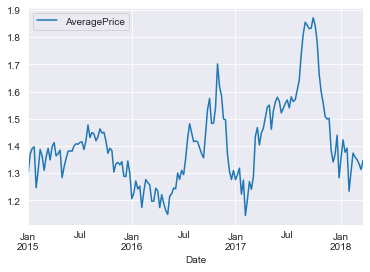

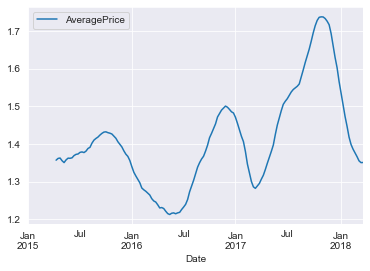

In [61]:
avocado_mean.plot()
avocado_mean.rolling(15).mean().plot()

<AxesSubplot:xlabel='Date', ylabel='AveragePrice'>

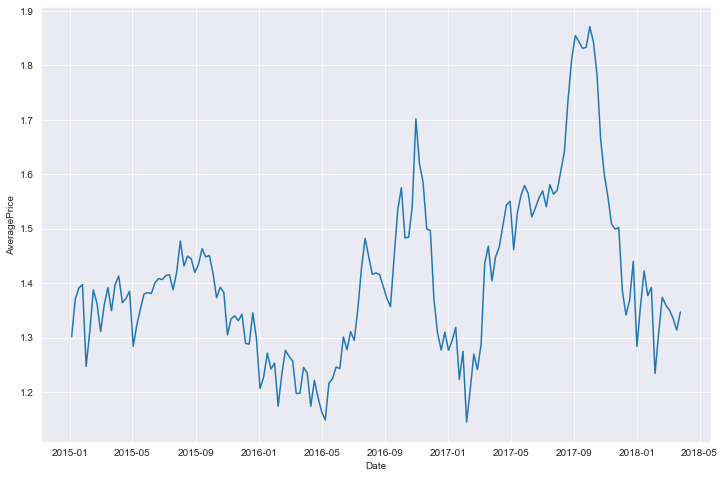

In [57]:
plt.figure(figsize=(12, 8)) # Изменяем размер
sns.lineplot(x=avocado_mean.index, y=avocado_mean.AveragePrice)

In [ ]:
avocado_mean_2 = avocado_mean\
                .rolling(2)\
                .mean()
avocado_mean_4 = avocado_mean\
                .rolling(4)\
                .mean()
avocado_mean_10 = avocado_mean\
                .rolling(10)\
                .mean()
avocado_mean_50 = avocado_mean\
                .rolling(50)\
                .mean()

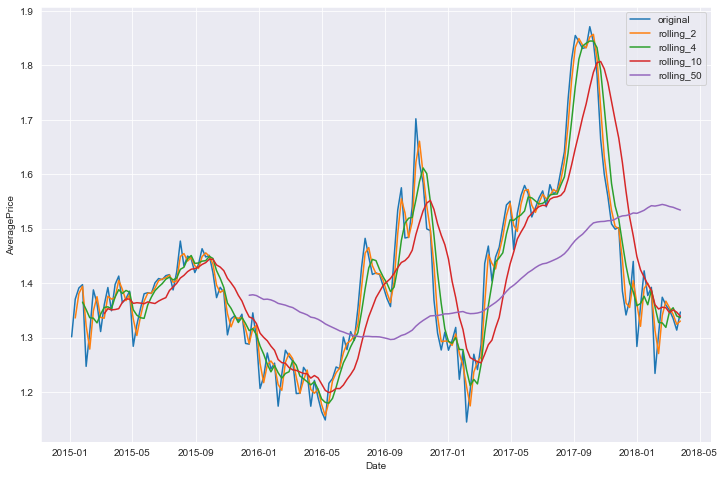

In [59]:
# Первый вариант
plt.figure(figsize=(12, 8))
sns.lineplot(x=avocado_mean.index, y=avocado_mean.AveragePrice, label='original')
sns.lineplot(x=avocado_mean_2.index, y=avocado_mean_2.AveragePrice, label='rolling_2')
sns.lineplot(x=avocado_mean_4.index, y=avocado_mean_4.AveragePrice, label='rolling_4')
sns.lineplot(x=avocado_mean_10.index, y=avocado_mean_10.AveragePrice, label='rolling_10')
sns.lineplot(x=avocado_mean_50.index, y=avocado_mean_50.AveragePrice, label='rolling_50')
plt.show()

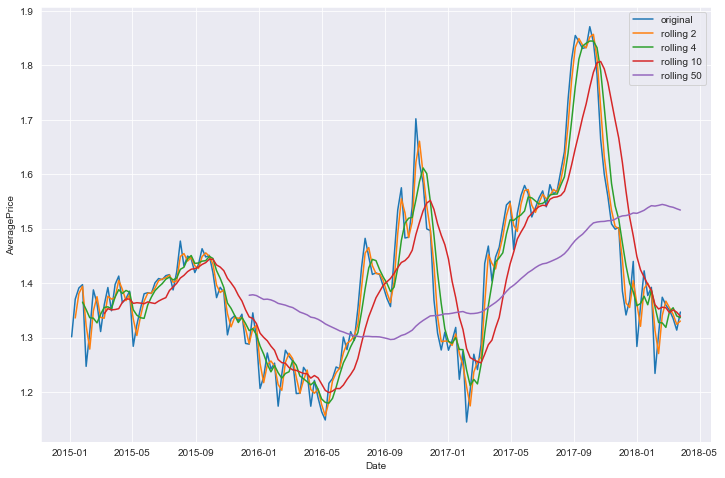

In [60]:
# Второй вариант
plt.figure(figsize=(12, 8))
windows = [2, 4, 10, 50]

sns.lineplot(x=avocado_mean.index, y=avocado_mean.AveragePrice, label='original')
for window in windows:
    tdf = avocado_mean\
            .rolling(window)\
            .mean()
    sns.lineplot(x=tdf.index, y=tdf.AveragePrice, label=f'rolling {window}')
plt.show()

4) ⭐️Задание со звёздочкой!⭐️
​​​​Изучите параметры функций:
- axis
- center
- closed
- min_periods
- on
- win_type
- window
в документации https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html и дайте характеристику каждой из вышеперечисленных.

In [50]:
# - axis # - center # - closed # - min_periods # - on # - win_type # - window
# в документации https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html и дайте характеристику каждой из вышеперечисленных.

5) ⭐️Задание со звёздочкой!⭐️
Используйте агрегированные данные avocado_mean.csv о ценах на авокадо и примените функцию ewm() с параметром span=2, чтобы получить экспоненциальное скользящее среднее. Запишите результат в avocado_ewm.

In [62]:
avocado_ewm = avocado_mean.ewm(span=2).mean()
print('\nЭкспоненциальное скользящее среднее\n', avocado_ewm)


Экспоненциальное скользящее среднее
             AveragePrice
Date                    
2015-01-04      1.301296
2015-01-11      1.353310
2015-01-18      1.379480
2015-01-25      1.391394
2015-02-01      1.294758
2015-02-08      1.305242
2015-02-15      1.360168
2015-02-22      1.361846
2015-03-01      1.327959
2015-03-08      1.349382
2015-03-15      1.377757
2015-03-22      1.358758
2015-03-29      1.384648
2015-04-05      1.403525
2015-04-12      1.377163
2015-04-19      1.373499
2015-04-26      1.381290
2015-05-03      1.316356
2015-05-10      1.321131
2015-05-17      1.342476
2015-05-24      1.367801
2015-05-31      1.377538
2015-06-07      1.379797
2015-06-14      1.393574
2015-06-21      1.403475
2015-06-28      1.405479
2015-07-05      1.411024
2015-07-12      1.414107
2015-07-19      1.396369
2015-07-26      1.412679
2015-08-02      1.455769
2015-08-09      1.439454
2015-08-16      1.446361
2015-08-23      1.445145
2015-08-30      1.428011
2015-09-06      1.432238
2015-09-13  

6) ⭐️Задание со звёздочкой!⭐️
И еще один стэп, чтобы закрепить материал. Импортируйте полные данные, (avocado_full.csv) указав index_col=0 (использовать первую колонку как индекс).
Для авокадо типа organic (type) в Чикаго (region) посчитайте скользящее среднее с окном 4 и экспоненциальное скользящее среднее с параметром span=4. Постройте графики, а затем заполните пропуски. Числа округлите до трех знаков после точки.

            AveragePrice  Total Volume        4046       4225       4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  year              region
Date                                                                                                                                                             
2015-01-04          1.75      27365.89     9307.34    3844.81     615.28    13598.46    13061.10      537.36         0.00       organic  2015           Southeast
2015-01-04          1.49      17723.17     1189.35   15628.27       0.00      905.55      905.55        0.00         0.00       organic  2015             Chicago
2015-01-04          1.68       2896.72      161.68     206.96       0.00     2528.08     2528.08        0.00         0.00       organic  2015  HarrisburgScranton
2015-01-04          1.52      54956.80     3013.04   35456.88    1561.70    14925.18    11264.80     3660.38         0.00  conventional  2015          Pittsburgh
2015-01-04          1.64    

C:\Users\Павел\AppData\Local\Temp\ipykernel_8728\3614247676.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avocado_organic_chicago['rolling'] = avocado_organic_chicago.AveragePrice.rolling(4).mean()
C:\Users\Павел\AppData\Local\Temp\ipykernel_8728\3614247676.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avocado_organic_chicago['ewm'] = avocado_organic_chicago.AveragePrice.ewm(span=4).mean()


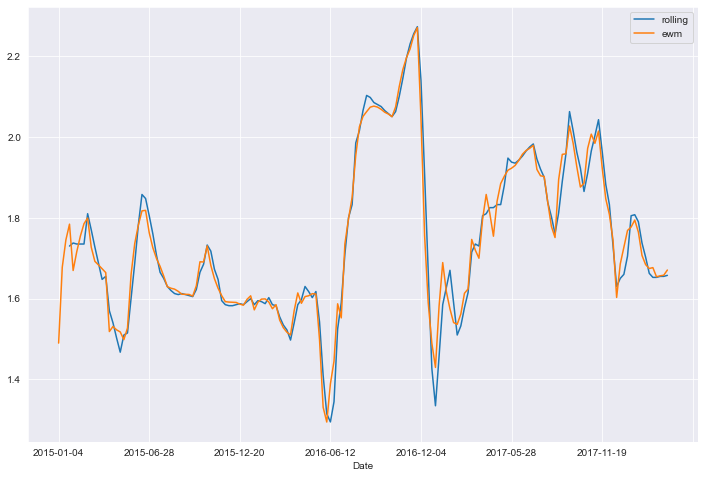


Цена авакадо 2016-08-21 при подсчёте скользящего среднего:
 AveragePrice      2.08
rolling         2.1025
Name: 2016-08-21, dtype: object

Цена авакадо 2017-02-19 при подсчёте экспоненциальноun скользящего среднего:
             AveragePrice       ewm
Date                              
2017-02-19           1.6  1.561849


In [65]:
avocado_full = 'e:\!Data-scientist\!!LessonPre\[Stepic] Анатолий Карпов - Твой путь в мир Data Analytics\Data\\avocado_full.csv'
avocado_full = pd.read_csv(avocado_full, index_col=0)

print(avocado_full)
avocado_organic_chicago = avocado_full.query('type == "organic" and region == "Chicago"')
# print('\nВыделим регион и тип по заданию\n', avocado_organic_chicago)

avocado_organic_chicago['rolling'] = avocado_organic_chicago.AveragePrice.rolling(4).mean()
# print('\nДобавим столбец "скользящая средняя"\n', avocado_organic_chicago)

avocado_organic_chicago['ewm'] = avocado_organic_chicago.AveragePrice.ewm(span=4).mean()
# print('\nДобавим столбец "экспоненциальное скользящее среднее"\n', avocado_organic_chicago)

avocado_organic_chicago[['rolling', 'ewm']].plot(figsize=(12, 8))
plt.show()

print('\nЦена авакадо 2016-08-21 при подсчёте скользящего среднего:\n', avocado_organic_chicago.loc['2016-08-21', ['AveragePrice', 'rolling']])
print('\nЦена авакадо 2017-02-19 при подсчёте экспоненциальноun скользящего среднего:\n', avocado_organic_chicago.loc['2017-02-19':'2017-02-19', ['AveragePrice','ewm']])

7) 💀 Сложное задание! 💀
Далее будем работать с данными по опозданиям в заключении сделок!
В файле delays находится информация о том какие компании с кем и на какую сумму заключали сделки, а самое важное – насколько они при этом опоздали. Вот сабсэт данных

 		client_idcompany_id	delay		revenue
 	0	2389	4240	-1 days -14:57:48.000000000	705436
 	1	7614	9544	-4 days -02:14:23.000000000	859266
 	2	2052	2427	-0 days -06:08:57.000000000	812416
 	3	9635	8054	-0 days -23:40:19.000000000	162312
 	4	8154	5503	-1 days -13:21:53.000000000	658844

Сначала давайте переведём delay в timedelta формат. Обратите внимание, что так просто столбец не переведётся – нужно будет убрать -. Сохраните данные в переменную df, отформатируйте колонку нужным способом (подсказка – уберите -) и переведите её в тип timedelta.
Могут понадобиться:
pd.to_timedelta()
pd.Series.str

In [72]:
df = 'e:\!Data-scientist\!!LessonPre\[Stepic] Анатолий Карпов - Твой путь в мир Data Analytics\Data\\delays.csv'
df = pd.read_csv(df)
print('\n выгрузим новый файл "delays:\n"', df.head())

df['delay'] = pd.to_timedelta(df.delay.str.replace('-', ''))
print('\nПереведём delay в timedelta формат и удалим из даты минусы:\n', df.head())
print('\nУбедимся, что колонка стала типом время:\n', df.dtypes)


 выгрузим новый файл "delays:
"    client_id  company_id                        delay  revenue
0       2389        4240  -1 days -14:57:48.000000000   705436
1       7614        9544  -4 days -02:14:23.000000000   859266
2       2052        2427  -0 days -06:08:57.000000000   812416
3       9635        8054  -0 days -23:40:19.000000000   162312
4       8154        5503  -1 days -13:21:53.000000000   658844

Переведём delay в timedelta формат и удалим из даты минусы:
    client_id  company_id           delay  revenue
0       2389        4240 1 days 14:57:48   705436
1       7614        9544 4 days 02:14:23   859266
2       2052        2427 0 days 06:08:57   812416
3       9635        8054 0 days 23:40:19   162312
4       8154        5503 1 days 13:21:53   658844

Убедимся, что колонка стала типом время:
 client_id               int64
company_id              int64
delay         timedelta64[ns]
revenue                 int64
dtype: object


8) 💀 Сложное задание! 💀
Разбилось конечно неплохо, но хочется чуть более целые значения и более человеческие названия. В этом нам помогут аргументы функции pd.cut!

Перезадайте колонку delay_categorical, чтобы значения в ней были
'less than 1 day' – время от 0 до 1 дня
'1-2 days' – от 1 до 2 дней
'2-3 days' – от 2 до 3 дней
'more than 3 days' – больше 3 дней

Например, для следующего примера
client_id  company_id  delay            revenue
14345      54631       2 days 13:34:45  145345
54434      54834       1 days 08:26:00  453245
34905      49834       0 days 00:26:03  14543

результом будет
client_id  company_id  delay            revenue  delay_categorical
14345      54631       2 days 13:34:45  145345   2-3 days
54434      54834       1 days 08:26:00  453245   1-2 days
34905      49834       0 days 00:26:03  14543    less than 1 day

Могут понадобится:
pd.cut()
pd.to_timedelta()

In [74]:
pd.cut(df.delay,
       bins=3,
       labels=['low', 'medium', 'high']
       )

0         low
1        high
2         low
3         low
4         low
5         low
6        high
7        high
8         low
9         low
10        low
11     medium
12        low
13       high
14       high
15        low
16        low
17       high
18       high
19        low
20       high
21       high
22     medium
23       high
24       high
25     medium
26     medium
27     medium
28       high
29       high
30       high
31     medium
32     medium
33     medium
34        low
35     medium
36     medium
37        low
38       high
39        low
40        low
41        low
42        low
43        low
44       high
45        low
46        low
47     medium
48     medium
49       high
50     medium
51     medium
52        low
53       high
54     medium
55       high
56        low
57     medium
58       high
59     medium
60        low
61     medium
62        low
63        low
64       high
65     medium
66        low
67     medium
68     medium
69     medium
70       high
71    

In [73]:
bins = [pd.to_timedelta('0d'),
        pd.to_timedelta('1d'),
        pd.to_timedelta('2d'),
        pd.to_timedelta('3d'),
        pd.to_timedelta('100d')]
labels= ['less than 1 day', '1-2 days', '2-3 days', 'more than 3 days']

df['delay_categorical'] = pd.cut(df.delay,
                     bins=bins,
                     labels= labels)

print('\nПерезальём колонку delay_categorical\n',  df)


Перезальём колонку delay_categorical
      client_id  company_id           delay  revenue delay_categorical
0         2389        4240 1 days 14:57:48   705436          1-2 days
1         7614        9544 4 days 02:14:23   859266  more than 3 days
2         2052        2427 0 days 06:08:57   812416   less than 1 day
3         9635        8054 0 days 23:40:19   162312   less than 1 day
4         8154        5503 1 days 13:21:53   658844          1-2 days
5         3346        3121 0 days 04:21:57   895712   less than 1 day
6         3066        2445 3 days 11:49:15   164010  more than 3 days
7         9207        5940 4 days 03:33:13   253494  more than 3 days
8         8173        8983 1 days 05:37:26   623845          1-2 days
9         6453        2775 0 days 07:52:48    21781   less than 1 day
10        5364        8167 0 days 00:34:21   419485   less than 1 day
11        8264        8351 2 days 06:42:23   992845          2-3 days
12        6214        8594 1 days 15:15:03   743701

11) Прекрасно! Теперь постройте интерактивный барплот с тем, насколько часто задерживаются сделки, выясните самый редкий и самый частый варианты.

In [ ]:
# 10) Прекрасно! Теперь постройте интерактивный барплот с тем, насколько часто задерживаются сделки, выясните самый редкий и самый частый варианты.